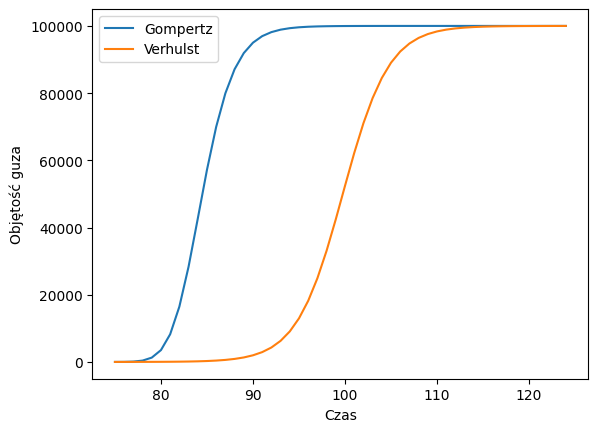

In [1]:
#POPULATION MODELS BY GOMPERTZ AND VERHULST

import numpy as np
import matplotlib.pyplot as plt

K = 100000  
r = 0.4 
t0 = 75  
x0 = 5  

def gompertz_eq(t, x):
    return r * x * np.log(K / x)

def euler(h, t, x):
    for i in range(1, len(t)):
        x[i] = x[i - 1] + h * gompertz_eq(t[i - 1], x[i - 1])
    return x

h = 1
t = np.arange(t0, t0 + 50, h)

x_gompertz = np.zeros(len(t))
x_gompertz[0] = x0

x_gompertz = euler(h, t, x_gompertz)

x_verhulst = K / (1 + ((K / x0) - 1) * np.exp(-r * (t - t0)))

plt.plot(t, x_gompertz, label='Gompertz')
plt.plot(t, x_verhulst, label='Verhulst')
plt.xlabel('Time')
plt.ylabel('Tumor volume')
plt.legend()
plt.show()

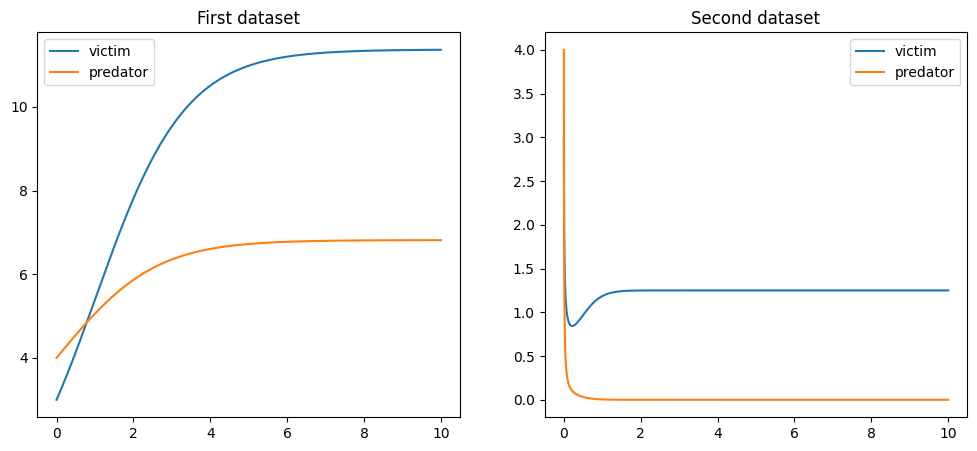

In [3]:
#COMPARISON OF TWO POPULATION MODELS WITH CHANGED PARAMITERS
n1 = [3]
n2 = [4]

e1 = 1.25
y1 = 0.5
h1 = 0.1
e2 = 0.5
y2 = 0.2
h2 = 0.2
h = 0.001
t = np.arange(0, 10, 0.001)

for _ in range(len(t)):
        new_n1 = n1[-1] + h*((e1-y1*(h1*n1[-1]+h2*n2[-1]))*n1[-1])
        new_n2 = n2[-1] + h*((e2-y2*(h1*n1[-1]+h2*n2[-1]))*n2[-1])
        n1.append(new_n1)
        n2.append(new_n2)


n3 = [3]
n4 = [4]

e3 = 5
y3 = 4
h3 = 1
e4 = 5
y4 = 8
h4 = 4
h = 0.001
t = np.arange(0, 10, 0.001)

for _ in range(len(t)):
        new_n3 = n3[-1] + h*((e3-y3*(h3*n3[-1]+h4*n4[-1]))*n3[-1])
        new_n4 = n4[-1] + h*((e4-y4*(h3*n3[-1]+h4*n4[-1]))*n4[-1])
        n3.append(new_n3)
        n4.append(new_n4)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(t, n1[:-1], label='victim')
ax1.plot(t, n2[:-1], label='predator')
ax1.set_title('First dataset')
ax1.legend()

ax2.plot(t, n3[:-1], label='victim')
ax2.plot(t, n4[:-1], label='predator')
ax2.set_title('Second dataset')
ax2.legend()

plt.show()

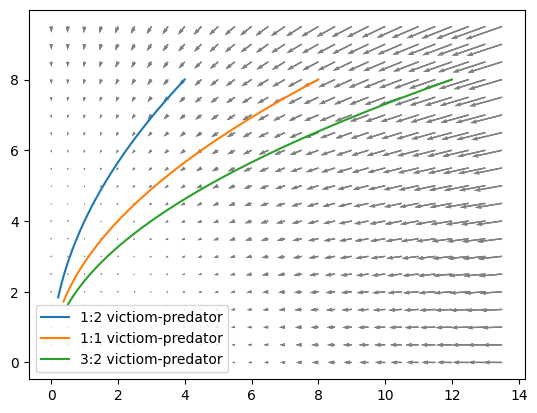

In [5]:
#POPULATION MODELS WITH DIFFRENT PARAMITERS 
n1_1 = [4]
n2_1 = [8]
n1_2 = [8]
n2_2 = [8]
n1_3 = [12]
n2_3 = [8]

e1 = 0.8
y1 = 1.0
h1 = 0.3
e2 = 0.4
y2 = 0.5
h2 = 0.4
h = 0.001
t = np.arange(0, 50, 0.0001)

for _ in range(len(t)):
        new_n1_1 = n1_1[-1] + h*((e1-y1*(h1*n1_1[-1]+h2*n2_1[-1]))*n1_1[-1])
        new_n2_1 = n2_1[-1] + h*((e2-y2*(h1*n1_1[-1]+h2*n2_1[-1]))*n2_1[-1])
        new_n1_2 = n1_2[-1] + h*((e1-y1*(h1*n1_2[-1]+h2*n2_2[-1]))*n1_2[-1])
        new_n2_2 = n2_2[-1] + h*((e2-y2*(h1*n1_2[-1]+h2*n2_2[-1]))*n2_2[-1])
        new_n1_3 = n1_3[-1] + h*((e1-y1*(h1*n1_3[-1]+h2*n2_3[-1]))*n1_3[-1])
        new_n2_3 = n2_3[-1] + h*((e2-y2*(h1*n1_3[-1]+h2*n2_3[-1]))*n2_3[-1])
        n1_1.append(new_n1_1)
        n2_1.append(new_n2_1)
        n1_2.append(new_n1_2)
        n2_2.append(new_n2_2)
        n1_3.append(new_n1_3)
        n2_3.append(new_n2_3)


gradient = np.meshgrid(np.arange(0, 14, 0.5), np.arange(0, 10, 0.5))
n1_1prim =(e1 - y1*(h1*gradient[0]+h2*gradient[1])*gradient[0])
n2_1prim =(e2 - y2*(h1*gradient[0]+h2*gradient[1])*gradient[1])
n1_2prim =(e1 - y1*(h1*gradient[0]+h2*gradient[1])*gradient[0])
n2_2prim =(e2 - y2*(h1*gradient[0]+h2*gradient[1])*gradient[1])
n1_3prim =(e1 - y1*(h1*gradient[0]+h2*gradient[1])*gradient[0])
n2_3prim =(e2 - y2*(h1*gradient[0]+h2*gradient[1])*gradient[1])

plt.plot(n1_1[0:-1], n2_1[0:-1], label = "1:2 victiom-predator")
plt.plot(n1_2[0:-1], n2_2[0:-1], label = "1:1 victiom-predator")
plt.plot(n1_3[0:-1], n2_3[0:-1], label = "3:2 victiom-predator")
plt.quiver(gradient[0], gradient[1], n1_1prim, n2_1prim, color='gray', alpha=1)
plt.quiver(gradient[0], gradient[1], n1_2prim, n2_2prim, color='gray', alpha=1)
plt.quiver(gradient[0], gradient[1], n1_3prim, n2_3prim, color='gray', alpha=1)
plt.legend()
plt.show()